Estratégia: https://www.projectpro.io/article/speech-emotion-recognition-project-using-machine-learning/573#mcetoc_1i4jlb94qo

Dataset: https://kaggle.com/datasets/tapakah68/emotions-on-audio-dataset/data

In [ ]:
from IPython.display import Audio, display
import librosa
import matplotlib.pyplot as plt

In [12]:
audio_file_path = "dataset/emotions-on-audio-dataset/files/00026029e0--64991b6eef1fe70609d48edc/joyfully.wav"

sample_rate = 16000
MAX_LENGTH = 3*sample_rate  # 3 seconds

display(Audio(filename=audio_file_path, rate=sample_rate))

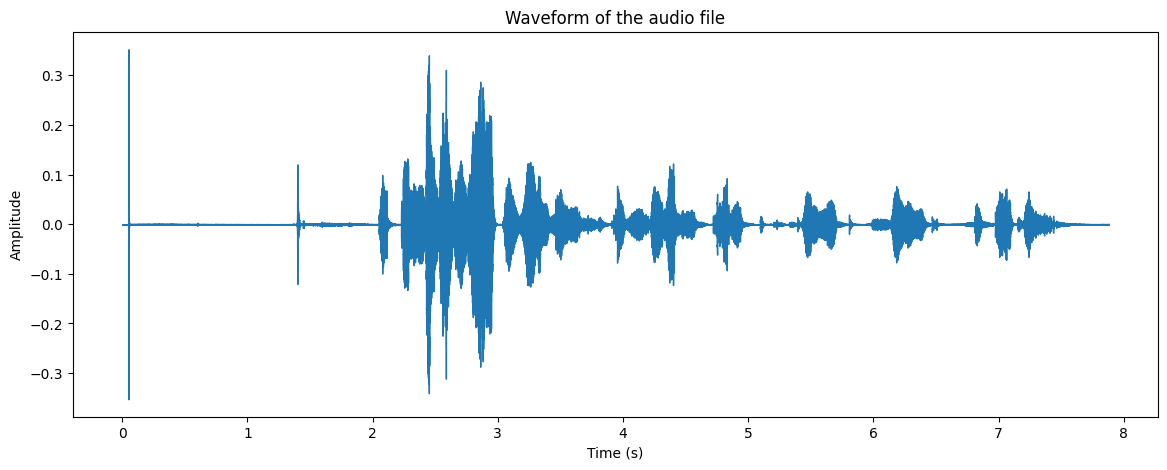

In [13]:
y, sr = librosa.load(audio_file_path, sr=sample_rate)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of the audio file')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [14]:
import os
import numpy as np
import librosa # type: ignore

def extract_mfcc(file_path, sample_rate=16000, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sample_rate, res_type='kaiser_fast')
    y = librosa.util.fix_length(y, size=MAX_LENGTH)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    
    return mfccs_mean

dataset_path = "dataset/emotions-on-audio-dataset/files/"
mfcc_features = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            try:
                file_path = os.path.join(root, file)
                mfcc = extract_mfcc(file_path)
                file_class = file.split('.')[0]
                mfcc_features.append((mfcc, file_class))
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue

print(f"Extracted {len(mfcc_features)} files.")
for i in range(5):
    print(mfcc_features[i])

Extracted 68 files.
(array([-550.1169   ,   57.586014 ,    7.4445286,   16.048016 ,
          3.2898383,    7.0323157,   -6.9131374,    1.3036351,
         -8.793457 ,    1.4542847,  -12.667265 ,    7.5637994,
         -4.853488 ,   12.237452 ,   -7.4192004,    4.4034114,
         -3.2826574,    4.686438 ,   -6.3861203,    5.966836 ,
         -5.98442  ,    0.7193007,   -5.2223444,    4.256798 ,
         -2.9231038,   -4.8588758,   -4.1350727,    1.4448099,
         -3.7545013,   -1.2527462,   -2.1475022,    1.3695161,
         -5.4594955,   -2.917828 ,   -3.522094 ,   -2.4275498,
         -2.9430165,   -1.364536 ,   -1.7074096,   -1.8119172],
      dtype=float32), 'euphoric')
(array([-4.6860797e+02,  5.9342585e+00,  3.2801871e+00,  5.4856625e+00,
       -2.7709908e+00,  9.6260589e-01, -1.7734728e+01,  3.8406739e+00,
       -8.1285572e+00, -2.6338162e+00, -5.0969129e+00,  2.2557273e+00,
       -3.5337391e+00,  1.1597045e+01, -6.8243160e+00,  3.2219722e+00,
       -4.1448197e+00, -1.215

In [21]:
# CNN

from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, Activation
from tensorflow.keras.models import Sequential

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Conv1D(64, 5, padding="same", input_shape=(40, 1)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(4)) # 4 emotion classes
model.add(Activation("softmax"))

model.summary()

/home/luusamp/gits/speech-emotion-recognition/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │        10,244 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,628 (41.52 KB)

 Trainable params: 10,628 (41.52 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Data splitting

dict_classes = {
    "euphoric": 0,
    "joyfully": 1,
    "sad": 2,
    "surprised": 3
}

X, y = zip(*mfcc_features)
X = np.array(X)
y = np.array(y)
y = np.array([dict_classes[label] for label in y])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_traincnn = X_train[..., np.newaxis]
X_testcnn = X_test[..., np.newaxis]

print(X_traincnn.shape, X_testcnn.shape)

(54, 40, 1) (14, 40, 1)


In [28]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_traincnn, y_train, epochs=100, batch_size=32, validation_data=(X_testcnn, y_test), verbose=0)

# evaluation
y_pred = model.predict(X_testcnn)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.21      1.00      0.35         3

    accuracy                           0.21        14
   macro avg       0.05      0.25      0.09        14
weighted avg       0.05      0.21      0.08        14

[[0 0 0 4]
 [0 0 0 3]
 [0 0 0 4]
 [0 0 0 3]]


/home/luusamp/gits/speech-emotion-recognition/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/luusamp/gits/speech-emotion-recognition/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/luusamp/gits/speech-emotion-recognition/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

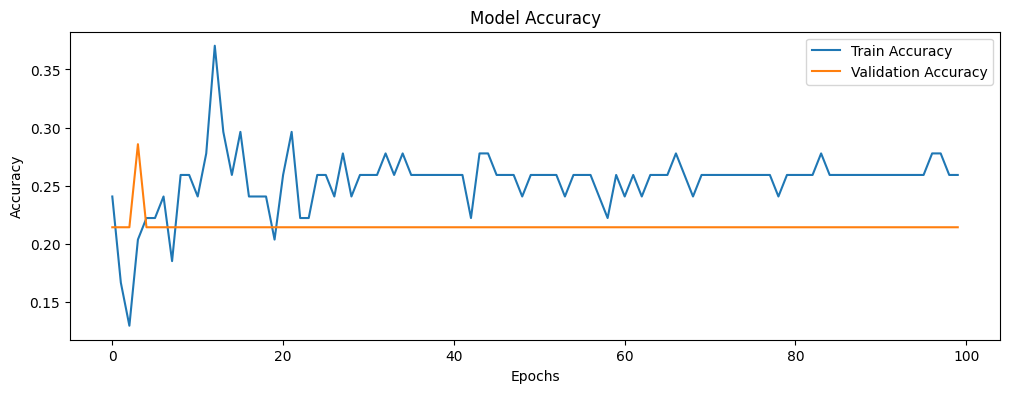

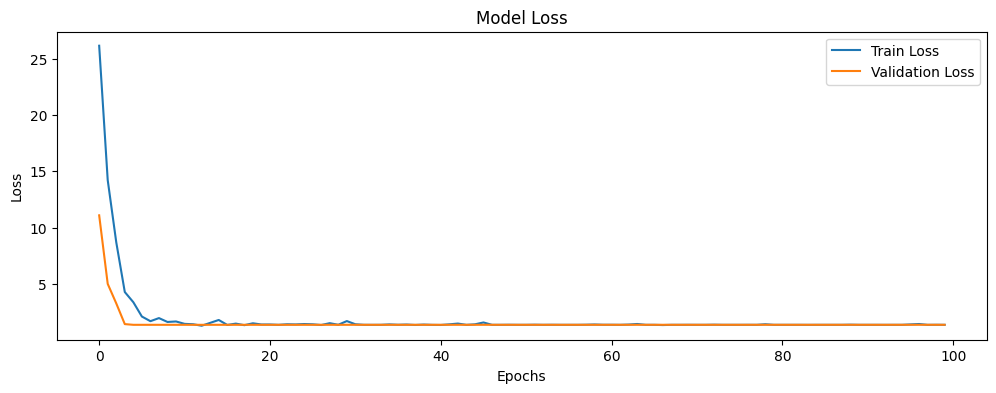

In [29]:
# Plots

# Accuracy plot
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()